In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv('../data/Cleaned_Spotify_2024_Global_Streaming_Data.csv')
print(df.head())
print(df.info())

         Country        Artist                    Album      Genre  \
0        Germany  Taylor Swift  1989 (Taylor's Version)      K-pop   
1         Brazil    The Weeknd              After Hours        R&B   
2  United States   Post Malone                   Austin  Reggaeton   
3          Italy    Ed Sheeran        Autumn Variations      K-pop   
4          Italy    Ed Sheeran        Autumn Variations        R&B   

   Release Year  Monthly Listeners (Millions)  Total Streams (Millions)  \
0          2020                         23.10                   3695.53   
1          2023                         60.60                   2828.16   
2          2019                         42.84                   1425.46   
3          2019                         73.24                   2704.33   
4          2019                          7.89                   3323.25   

   Total Hours Streamed (Millions)  Avg Stream Duration (Min) Platform Type  \
0                         14240.35               

In [51]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 Country                            0
Artist                             0
Album                              0
Genre                              0
Release Year                       0
Monthly Listeners (Millions)       0
Total Streams (Millions)           0
Total Hours Streamed (Millions)    0
Avg Stream Duration (Min)          0
Platform Type                      0
Streams Last 30 Days (Millions)    0
Skip Rate (%)                      0
dtype: int64


In [52]:
#the total number of Spotify streams across all records for the year 2024
total_streams = df["Total Streams (Millions)"].sum()
print(f"Total Streams in 2024: {total_streams:.2f} Million")

Total Streams in 2024: 1290577.04 Million


In [53]:
#the average number of monthly listeners grouped by each country
avg_listeners_by_country = df.groupby("Country")["Monthly Listeners (Millions)"].mean()
print(avg_listeners_by_country.head())

Country
Argentina    54.848148
Australia    56.390833
Brazil       52.213333
Canada       57.749600
France       40.895217
Name: Monthly Listeners (Millions), dtype: float64


In [54]:
# Top 10 artists globally with the highest total Spotify streams in 2024
top_artists_by_streams = (
    df.groupby("Artist")["Total Streams (Millions)"]
    .sum().sort_values(ascending=False).head(10))

print("Top 10 Artists by Total Streams in 2024:\n")
print(top_artists_by_streams)


Top 10 Artists by Total Streams in 2024:

Artist
BTS               124299.47
Dua Lipa          111305.99
Bad Bunny         106216.16
BLACKPINK         102238.89
Doja Cat           90098.83
Ed Sheeran         87859.35
Karol G            86737.71
Olivia Rodrigo     84378.54
Billie Eilish      82174.91
Drake              80948.91
Name: Total Streams (Millions), dtype: float64


In [55]:
#the total hours streamed for each genre
total_hours_by_genre = df.groupby("Genre")["Total Hours Streamed (Millions)"].sum()
print(total_hours_by_genre)

Genre
Classical    675147.96
EDM          453184.72
Hip Hop      382786.41
Indie        454210.69
Jazz         342870.29
K-pop        463827.47
Pop          423169.99
R&B          399807.28
Reggaeton    367315.38
Rock         514864.25
Name: Total Hours Streamed (Millions), dtype: float64


In [56]:
#the 10 albums with the highest number of monthly listeners
top_albums_by_listeners = df.groupby("Album")["Monthly Listeners (Millions)"].sum().nlargest(10)
print(top_albums_by_listeners)

Album
Proof                                  2770.65
Autumn Variations                      1915.77
Nadie Sabe Lo Que Va a Pasar Mañana    1854.72
BORN PINK                              1849.17
MAÑANA SERÁ BONITO                     1836.16
Guts                                   1805.98
Scarlet                                1764.77
For All The Dogs                       1643.83
Future Nostalgia                       1578.33
SOS                                    1531.59
Name: Monthly Listeners (Millions), dtype: float64


In [57]:
#the average number of streams by platform type (Free vs Premium)
platform_vs_streams = df.groupby("Platform Type")["Total Streams (Millions)"].mean()
print(platform_vs_streams)

Platform Type
Free       2554.74388
Premium    2607.56428
Name: Total Streams (Millions), dtype: float64


In [58]:
#the number of unique albums released in 2024 for each country
albums_by_country_2023 = df[df["Release Year"] == 2023].groupby("Country")["Album"].nunique()
print("Unique albums released in 2023 by country:")
print(albums_by_country_2023)


Unique albums released in 2023 by country:
Country
Argentina         2
Australia         3
Brazil            3
Canada            1
France            3
Germany           1
India             2
Indonesia         2
Italy             3
Japan             1
Mexico            1
Netherlands       2
Russia            2
South Africa      3
South Korea       3
Spain             3
Sweden            3
Turkey            3
United Kingdom    3
United States     2
Name: Album, dtype: int64


In [59]:
#the average stream duration in minutes for each music genre
avg_duration_by_genre = df.groupby("Genre")["Avg Stream Duration (Min)"].mean()
print(avg_duration_by_genre)

Genre
Classical    3.543056
EDM          3.518039
Hip Hop      3.532857
Indie        3.498800
Jazz         3.434884
K-pop        3.513750
Pop          3.443864
R&B          3.620244
Reggaeton    3.555682
Rock         3.534138
Name: Avg Stream Duration (Min), dtype: float64


In [60]:
#the top 10 music genres based on total hours streamed
top_genres_by_hours = df.groupby("Genre")["Total Hours Streamed (Millions)"].sum().nlargest(10)
print(top_genres_by_hours)

Genre
Classical    675147.96
Rock         514864.25
K-pop        463827.47
Indie        454210.69
EDM          453184.72
Pop          423169.99
R&B          399807.28
Hip Hop      382786.41
Reggaeton    367315.38
Jazz         342870.29
Name: Total Hours Streamed (Millions), dtype: float64


In [61]:
#what percentage of total streams come from premium users
premium_vs_free = df[df["Platform Type"] == "Premium"]["Total Streams (Millions)"].sum() / df["Total Streams (Millions)"].sum() * 100
print(f"Percentage of Premium Streams: {premium_vs_free:.2f}%")

Percentage of Premium Streams: 50.51%


In [62]:
#how the year of release affects the average number of monthly listeners
release_vs_listeners = df.groupby("Release Year")["Monthly Listeners (Millions)"].mean()
print(release_vs_listeners.head())

Release Year
2018    53.026774
2019    49.392356
2020    47.817222
2021    49.977568
2022    52.064694
Name: Monthly Listeners (Millions), dtype: float64


In [63]:
#the average skip rate % for each country
avg_skip_rate_by_country = df.groupby("Country")["Skip Rate (%)"].mean()
print(avg_skip_rate_by_country.head())

Country
Argentina    22.616296
Australia    17.448333
Brazil       20.593333
Canada       20.520000
France       19.081739
Name: Skip Rate (%), dtype: float64


In [64]:
#how many unique artists have more than 50 million monthly listeners
high_listeners_count = len(df[df["Monthly Listeners (Millions)"] > 50]["Artist"].unique())
print(f"Artists with >50M Monthly Listeners: {high_listeners_count}")

Artists with >50M Monthly Listeners: 15


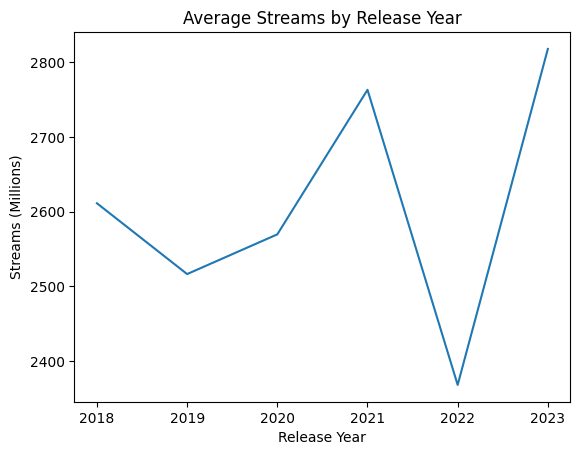

In [65]:
df.groupby("Release Year")["Total Streams (Millions)"].mean().plot(kind="line")
plt.title("Average Streams by Release Year")
plt.ylabel("Streams (Millions)")
plt.show()

In [66]:
#average skip rate for each genre specifically in the United States
us_skip_rate = df[df["Country"] == "United States"].groupby("Genre")["Skip Rate (%)"].mean()
print(us_skip_rate)

Genre
Classical     6.800000
EDM          22.930000
Hip Hop      17.080000
Indie        17.370000
Jazz         34.530000
K-pop        23.250000
Pop          27.955000
R&B           3.590000
Reggaeton    16.720000
Rock         13.656667
Name: Skip Rate (%), dtype: float64


In [67]:
#total streams in selected European countries
european_streams = df[df["Country"].isin(["Germany", "Italy", "France", "Spain", "UK"])]["Total Streams (Millions)"].sum()
print(f"Total Streams in Europe: {european_streams:.2f} Million")

Total Streams in Europe: 252781.53 Million


In [68]:
#the 10 albums with the highest streams in the past 30 days
top_albums_last_30 = df.nlargest(10, "Streams Last 30 Days (Millions)")[["Album", "Streams Last 30 Days (Millions)"]]
print(top_albums_last_30)

                                   Album  Streams Last 30 Days (Millions)
133              1989 (Taylor's Version)                           200.00
73                     Autumn Variations                           199.91
218                     Eternal Sunshine                           198.06
148                                Proof                           197.84
187                                  SOS                           197.83
21   Nadie Sabe Lo Que Va a Pasar Mañana                           197.08
50                             BORN PINK                           196.16
354                     For All The Dogs                           196.15
445                     Eternal Sunshine                           194.95
293                          After Hours                           194.82


In [69]:
#total streamed hours per platform type (Free, Premium)
hours_by_platform = df.groupby("Platform Type")["Total Hours Streamed (Millions)"].sum()
print(hours_by_platform)

Platform Type
Free       2213276.95
Premium    2263907.49
Name: Total Hours Streamed (Millions), dtype: float64


In [70]:
#the average monthly listeners for each music genre
listeners_by_genre = df.groupby("Genre")["Monthly Listeners (Millions)"].mean()
print(listeners_by_genre)

Genre
Classical    55.132639
EDM          50.842941
Hip Hop      44.706939
Indie        51.238000
Jazz         52.793953
K-pop        51.107500
Pop          50.553182
R&B          50.124390
Reggaeton    46.201364
Rock         54.653966
Name: Monthly Listeners (Millions), dtype: float64


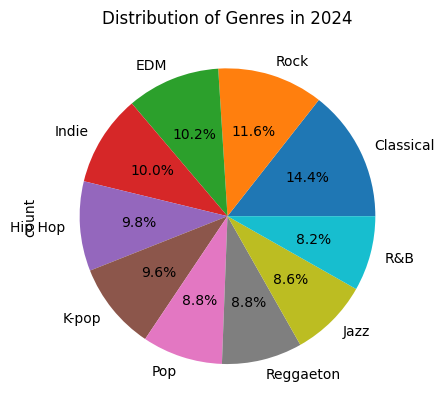

In [71]:
#the share of each music genre using a pie chart
df["Genre"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Distribution of Genres in 2024")
plt.show()

In [72]:
#how many hours of streaming happened in 2024, averaged per country
country_vs_hours = df[df["Release Year"] == 2023].groupby("Country")["Total Hours Streamed (Millions)"].mean()
print(country_vs_hours.head())

Country
Argentina    11223.676000
Australia    11184.216667
Brazil        8751.698000
Canada       10531.512000
France       11156.963333
Name: Total Hours Streamed (Millions), dtype: float64


In [73]:
#how many albums have a skip rate lower than 10%
low_skip_count = len(df[df["Skip Rate (%)"] < 10]["Album"].unique())
print(f"Albums with Skip Rate < 10%: {low_skip_count}")

Albums with Skip Rate < 10%: 15


In [74]:
#the share of total streams that come from major Asian countries
asia_streams = df[df["Country"].isin(["Japan", "South Korea", "India"])]["Total Streams (Millions)"].sum() / df["Total Streams (Millions)"].sum() * 100
print(f"Percentage of Streams in Asia: {asia_streams:.2f}%")

Percentage of Streams in Asia: 15.92%


In [75]:
#average streams for free vs premium users in Brazil
br_platform_vs_streams = df[df["Country"] == "Brazil"].groupby("Platform Type")["Total Streams (Millions)"].mean()
print(br_platform_vs_streams)

Platform Type
Free       2934.872308
Premium    2307.635882
Name: Total Streams (Millions), dtype: float64


In [76]:
#changes in skip rate over different release years
release_vs_skip = df.groupby("Release Year")["Skip Rate (%)"].mean()
print(release_vs_skip.head())

Release Year
2018    21.236452
2019    20.916782
2020    20.405370
2021    16.045135
2022    20.145102
Name: Skip Rate (%), dtype: float64


In [77]:
#the total number of monthly listeners for each country
total_listeners_by_country = df.groupby("Country")["Monthly Listeners (Millions)"].sum()
print(total_listeners_by_country.head())

Country
Argentina    1480.90
Australia     676.69
Brazil       1566.40
Canada       1443.74
France        940.59
Name: Monthly Listeners (Millions), dtype: float64


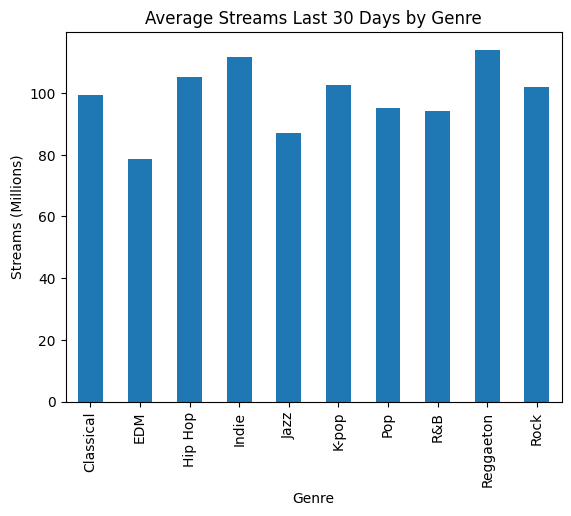

In [78]:
df.groupby("Genre")["Streams Last 30 Days (Millions)"].mean().plot(kind="bar")
plt.title("Average Streams Last 30 Days by Genre")
plt.ylabel("Streams (Millions)")
plt.show()

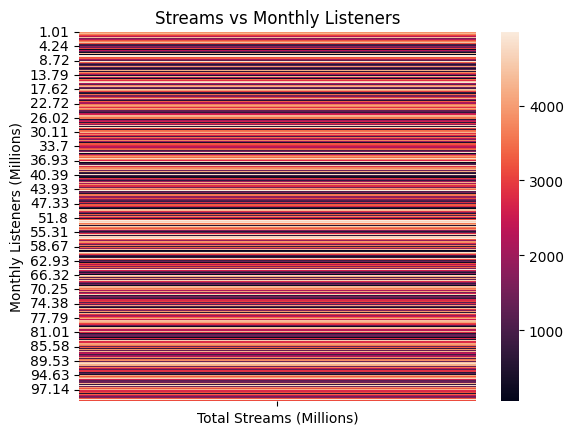

In [79]:
pivot = df.pivot_table(values="Total Streams (Millions)", index="Monthly Listeners (Millions)", aggfunc="mean")
sns.heatmap(pivot)
plt.title("Streams vs Monthly Listeners")
plt.show()

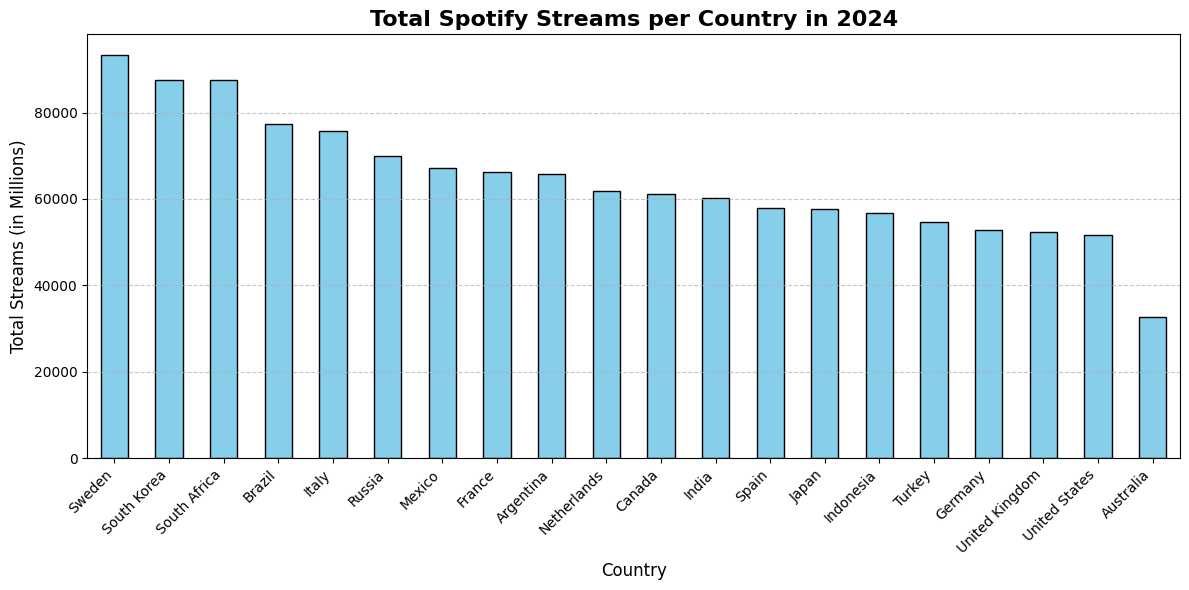

In [80]:
df.groupby("Country")["Total Streams (Millions)"].sum().sort_values(ascending=False).plot(kind="bar", figsize=(12,6), color="skyblue", edgecolor="black")

plt.title("Total Spotify Streams per Country in 2024", fontsize=16, fontweight='bold')
plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Streams (in Millions)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()